In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf

In [ ]:
DATADIR = "/content/drive/MyDrive/vehicle_classification_data_200"
CATEGORIES = ["2w","bus","car"]

In [ ]:
for category in CATEGORIES:
  categories = []
  categories_index=[]
  path = os.path.join(DATADIR, category)
  filenames=os.listdir(path)
  for filename in os.listdir(path):
    categories.append(category)
    categories_index.append(CATEGORIES.index(category))
  if(CATEGORIES.index(category)==0):  
    df = pd.DataFrame({
      'filename': filenames,
      'category': categories,
      'category_index':categories_index
      })
  else:
    df2 = pd.DataFrame({
      'filename': filenames,
      'category': categories,
      'category_index':categories_index
      })
    df = df.append(df2)  

In [ ]:
df

,filename,category,category_index
0,1606910283.9744563.jpg.jpg,2w,0
1,1606907642.0297499.jpg.jpg,2w,0
2,1606909075.26634.jpg.jpg,2w,0
3,1606907822.0108523.jpg.jpg,2w,0
4,1606910457.4368374.jpg.jpg,2w,0
...,...,...,...
2234,1593507531.6159992.jpg.jpg,car,2
2235,1593411080.7769907.jpg.jpg,car,2
2236,1606908858.458134.jpg.jpg,car,2
2237,1606908354.3655307.jpg.jpg,car,2


In [ ]:
df["category"].value_counts()

car    2239
bus    1933
2w     1815
Name: category, dtype: int64

In [ ]:
# almost a balanced dataset so we need to worry much 😃

In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
df

,filename,category,category_index
0,1606910283.9744563.jpg.jpg,2w,0
1,1606907642.0297499.jpg.jpg,2w,0
2,1606909075.26634.jpg.jpg,2w,0
3,1606907822.0108523.jpg.jpg,2w,0
4,1606910457.4368374.jpg.jpg,2w,0
...,...,...,...
5982,1593507531.6159992.jpg.jpg,car,2
5983,1593411080.7769907.jpg.jpg,car,2
5984,1606908858.458134.jpg.jpg,car,2
5985,1606908354.3655307.jpg.jpg,car,2


In [ ]:
!pip install pillow
import requests
from PIL import Image

In [ ]:
image = Image.open("/content/drive/MyDrive/vehicle_classification_data_200/2w/1606907341.3854055.jpg.jpg")

In [ ]:

width, height = image.size
print(width,height)

60 192


In [ ]:
# so here I checked the sizes of images and found that all images are of different shapes so we will need to reshape them

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, AveragePooling2D
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 97, 97, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]


In [ ]:
df['category']=df['category'].astype(str)

In [ ]:
df['category_index']=df['category_index'].astype(str)

In [ ]:
df['filename']=df['category']+'/'+df['filename']

In [ ]:
df

,filename,category,category_index
0,2w/1606910283.9744563.jpg.jpg,2w,0
1,2w/1606907642.0297499.jpg.jpg,2w,0
2,2w/1606909075.26634.jpg.jpg,2w,0
3,2w/1606907822.0108523.jpg.jpg,2w,0
4,2w/1606910457.4368374.jpg.jpg,2w,0
...,...,...,...
5982,car/1593507531.6159992.jpg.jpg,car,2
5983,car/1593411080.7769907.jpg.jpg,car,2
5984,car/1606908858.458134.jpg.jpg,car,2
5985,car/1606908354.3655307.jpg.jpg,car,2


In [ ]:
#splitting training and validation data

In [ ]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42,shuffle=True)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
validate_df['category'].value_counts()

car    440
2w     385
bus    373
Name: category, dtype: int64

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=16

In [ ]:
total_train

4789

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    directory = "/content/drive/MyDrive/vehicle_classification_data_200/", 
    x_col='filename',
    y_col='category_index',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
)

Found 4789 validated image filenames belonging to 3 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    directory = "/content/drive/MyDrive/vehicle_classification_data_200/",  
    x_col='filename',
    y_col='category_index',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
)

Found 1198 validated image filenames belonging to 3 classes.


In [ ]:
epochs=5 if FAST_RUN else 30
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
299/299 [==============================] - 1754s 6s/step - loss: 0.5866 - accuracy: 0.8190 - val_loss: 1.8455 - val_accuracy: 0.5228
Epoch 2/30
299/299 [==============================] - 31s 105ms/step - loss: 0.3192 - accuracy: 0.8888 - val_loss: 0.1623 - val_accuracy: 0.9434
Epoch 3/30
299/299 [==============================] - 32s 106ms/step - loss: 0.1539 - accuracy: 0.9478 - val_loss: 0.0848 - val_accuracy: 0.9645
Epoch 4/30
299/299 [==============================] - 31s 103ms/step - loss: 0.1312 - accuracy: 0.9579 - val_loss: 0.0936 - val_accuracy: 0.9679
Epoch 5/30
299/299 [==============================] - 32s 107ms/step - loss: 0.1105 - accuracy: 0.9583 - val_loss: 0.0706 - val_accuracy: 0.9755
Epoch 6/30
299/299 [==============================] - 31s 103ms/step - loss: 0.1104 - accuracy: 0.9618 - val_loss: 0.0984 - val_accuracy: 0.9671
Epoch 7/30
299/299 [==============================] - 32s 108ms/step - loss: 0.0674 - accuracy: 0.9770 - val_loss: 0.1517 - val_acc

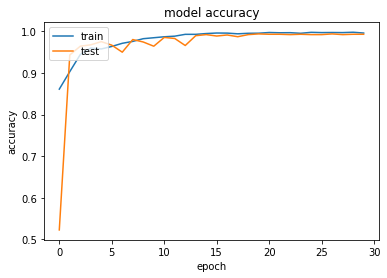

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

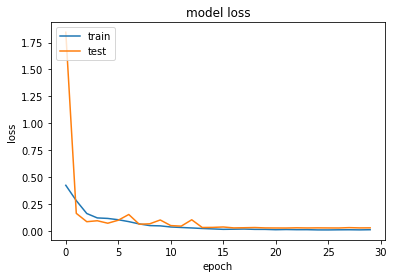

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pip install pyyaml h5py

In [ ]:
model.save('/content/drive/MyDrive/vehicle_classification_data_200/saved_model')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/vehicle_classification_data_200/saved_model/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/vehicle_classification_data_200/saved_model')


## Predicting some images


In [ ]:
from tensorflow.keras.preprocessing import image


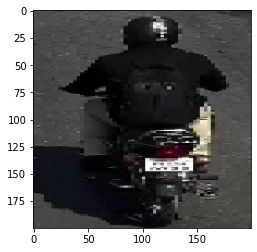

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
image_path="/content/drive/MyDrive/vehicle_classification_data_200/2w/1606907341.3854055.jpg.jpg"
img = image.load_img(image_path, target_size=(200, 200))
plt.imshow(img)
plt.show()
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
pred=new_model.predict_classes(img_batch)


In [ ]:
CATEGORIES[pred[0]] # our prediction is correct


'2w'

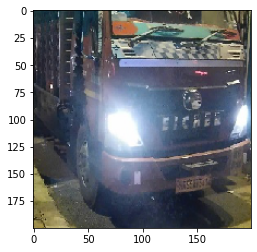

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
image_path="/content/drive/MyDrive/vehicle_classification_data_200/bus/1593376178.4513438.jpg.jpg"
img = image.load_img(image_path, target_size=(200, 200))
plt.imshow(img)
plt.show()
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
pred=new_model.predict_classes(img_batch)


In [ ]:
CATEGORIES[pred[0]] # our prediction is correct


'bus'

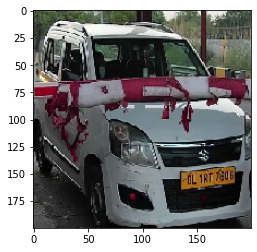

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
image_path="/content/drive/MyDrive/vehicle_classification_data_200/car/1593388998.5701687.jpg.jpg"
img = image.load_img(image_path, target_size=(200, 200))
plt.imshow(img)
plt.show()
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
pred=new_model.predict_classes(img_batch)


In [ ]:
CATEGORIES[pred[0]] # our prediction is correct


'car'